fb-pages-media.edges
fb-pages-media.nodes
readme.html

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# File paths
edges_file = 'fb-pages-media.edges'
nodes_file = 'fb-pages-media.nodes'

# Read the .nodes file (comma-separated worked previously)
nodes = pd.read_csv(nodes_file, sep=",")

# Try reading the .edges file (use comma separator, since node pairs seem to be comma-separated)
edges = pd.read_csv(edges_file, sep=",")

In [2]:
# Check the structure of the nodes file
print("===== First few lines of the .nodes file =====")
print(nodes)

===== First few lines of the .nodes file =====
                     id                          name  new_id
0          110134099668                    RadioTunes   27520
1      1698945480322189              Cameron Thompson   21450
2       199807093384960  Meteorologist Terran Kirksey   16014
3       231183476901428                   Julie Carey   10814
4       130968530253684                      630 CHED   13496
...                 ...                           ...     ...
27896   521485051221610                 Drama Channel   25548
27897   215303475498502                 John Ibbitson   14685
27898  1617110228572512                Gilles Bouleau    8390
27899   203806592978881                 Still Curtain   25187
27900       10431579593                    UrbanCincy   17672

[27901 rows x 3 columns]


In [3]:
# Check the structure of the edges file
print("\n===== First few lines of the .edges file =====")
print(edges)


===== First few lines of the .edges file =====
            0   9461
0           0  13035
1           0  12979
2           0  24089
3           0  10036
4           0  20763
...       ...    ...
206253  27743  27743
206254  27774  27813
206255  27783  27868
206256  27813  27825
206257  27816  27854

[206258 rows x 2 columns]


In [4]:
# Determine the correct column names from the nodes and edges files
node_column = nodes.columns[0]  # Assuming the node IDs are in the first column
edge_columns = edges.columns[:2]  # Assuming the first two columns are node pairs (adjust as necessary)

print(f"\nNode Column: {node_column}")
print(f"Edge Columns: {edge_columns}")


Node Column: id
Edge Columns: Index(['0', '9461'], dtype='object')


In [5]:
# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(nodes[node_column])

# Add edges to the graph
G.add_edges_from(edges[edge_columns].values)

print("Graph created successfully!")

Graph created successfully!


In [6]:
# Print basic graph information
print("===== Graph Information =====")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

===== Graph Information =====
Number of nodes: 55817
Number of edges: 206258


In [7]:
# 6. Calculate and print the minimum and maximum degree
degrees = dict(G.degree())
min_degree = min(degrees.values())
max_degree = max(degrees.values())
print(f"\nMinimum degree: {min_degree}")
print(f"Maximum degree: {max_degree}")

# Print degrees of all vertices
print("\n===== Degrees of all Vertices =====")
for node, degree in degrees.items():
    print(f"Node {node}: {degree}")


Minimum degree: 0
Maximum degree: 678

===== Degrees of all Vertices =====
Node 110134099668: 0
Node 1698945480322189: 0
Node 199807093384960: 0
Node 231183476901428: 0
Node 130968530253684: 0
Node 5510619796: 0
Node 254509578109: 0
Node 169828741647: 0
Node 599330996754016: 0
Node 344026838530: 0
Node 322744631148014: 0
Node 605218116224897: 0
Node 321668054486: 0
Node 31651194981: 0
Node 111949065494196: 0
Node 173077062832630: 0
Node 192099134851: 0
Node 1795995010662381: 0
Node 105456679546357: 0
Node 211372376326: 0
Node 440653956021225: 0
Node 203206913055203: 0
Node 706219259483271: 0
Node 149944271830853: 0
Node 307194069403540: 0
Node 31773545598: 0
Node 170781896295297: 0
Node 179497145428273: 0
Node 262024820663488: 0
Node 132772456754014: 0
Node 202151043156155: 0
Node 196001120414432: 0
Node 373535112855987: 0
Node 649919151800201: 0
Node 248217088548325: 0
Node 239948206465: 0
Node 849638278460763: 0
Node 6491828674: 0
Node 214418065283026: 0
Node 149428545124896: 0
Node

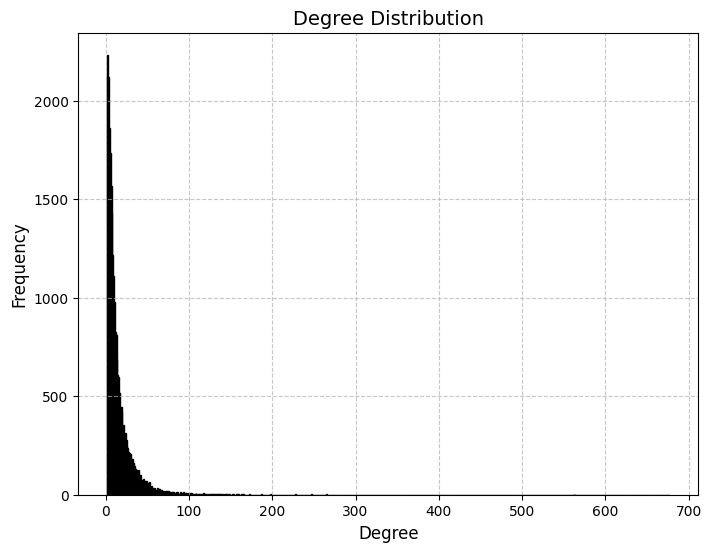

In [8]:
# Plot degree distribution
plt.figure(figsize=(8, 6))
plt.hist(degrees.values(), bins=range(1, max_degree+1), color='skyblue', edgecolor='black')
plt.title("Degree Distribution", fontsize=14)
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

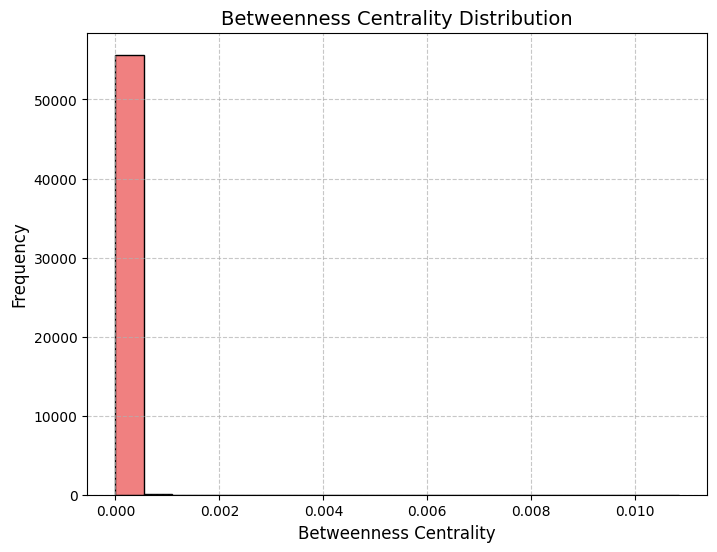

In [9]:
# Calculate and plot betweenness centrality
betweenness = nx.betweenness_centrality(G)
plt.figure(figsize=(8, 6))
plt.hist(betweenness.values(), bins=20, color='lightcoral', edgecolor='black')
plt.title("Betweenness Centrality Distribution", fontsize=14)
plt.xlabel("Betweenness Centrality", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

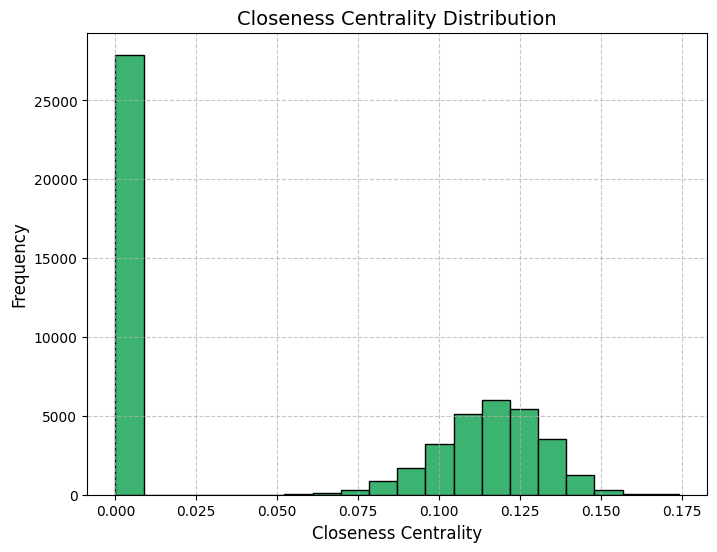

In [10]:
# Calculate and plot closeness centrality
closeness = nx.closeness_centrality(G)
plt.figure(figsize=(8, 6))
plt.hist(closeness.values(), bins=20, color='mediumseagreen', edgecolor='black')
plt.title("Closeness Centrality Distribution", fontsize=14)
plt.xlabel("Closeness Centrality", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

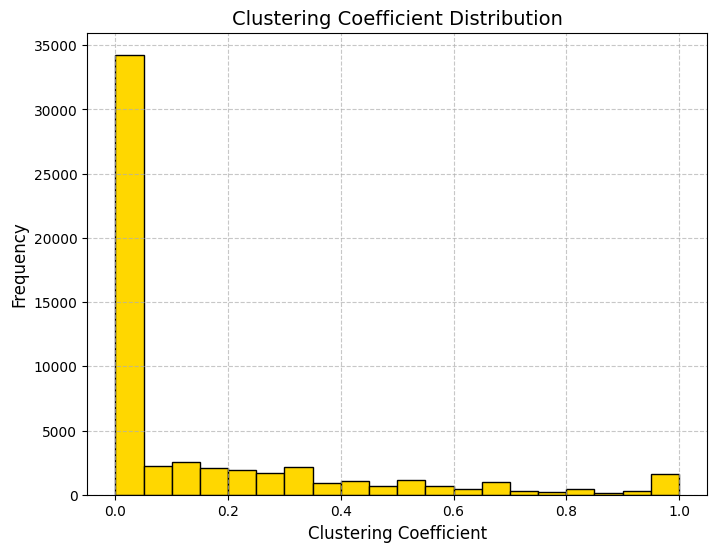

In [11]:
# Calculate and plot clustering coefficient
clustering = nx.clustering(G)
plt.figure(figsize=(8, 6))
plt.hist(clustering.values(), bins=20, color='gold', edgecolor='black')
plt.title("Clustering Coefficient Distribution", fontsize=14)
plt.xlabel("Clustering Coefficient", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

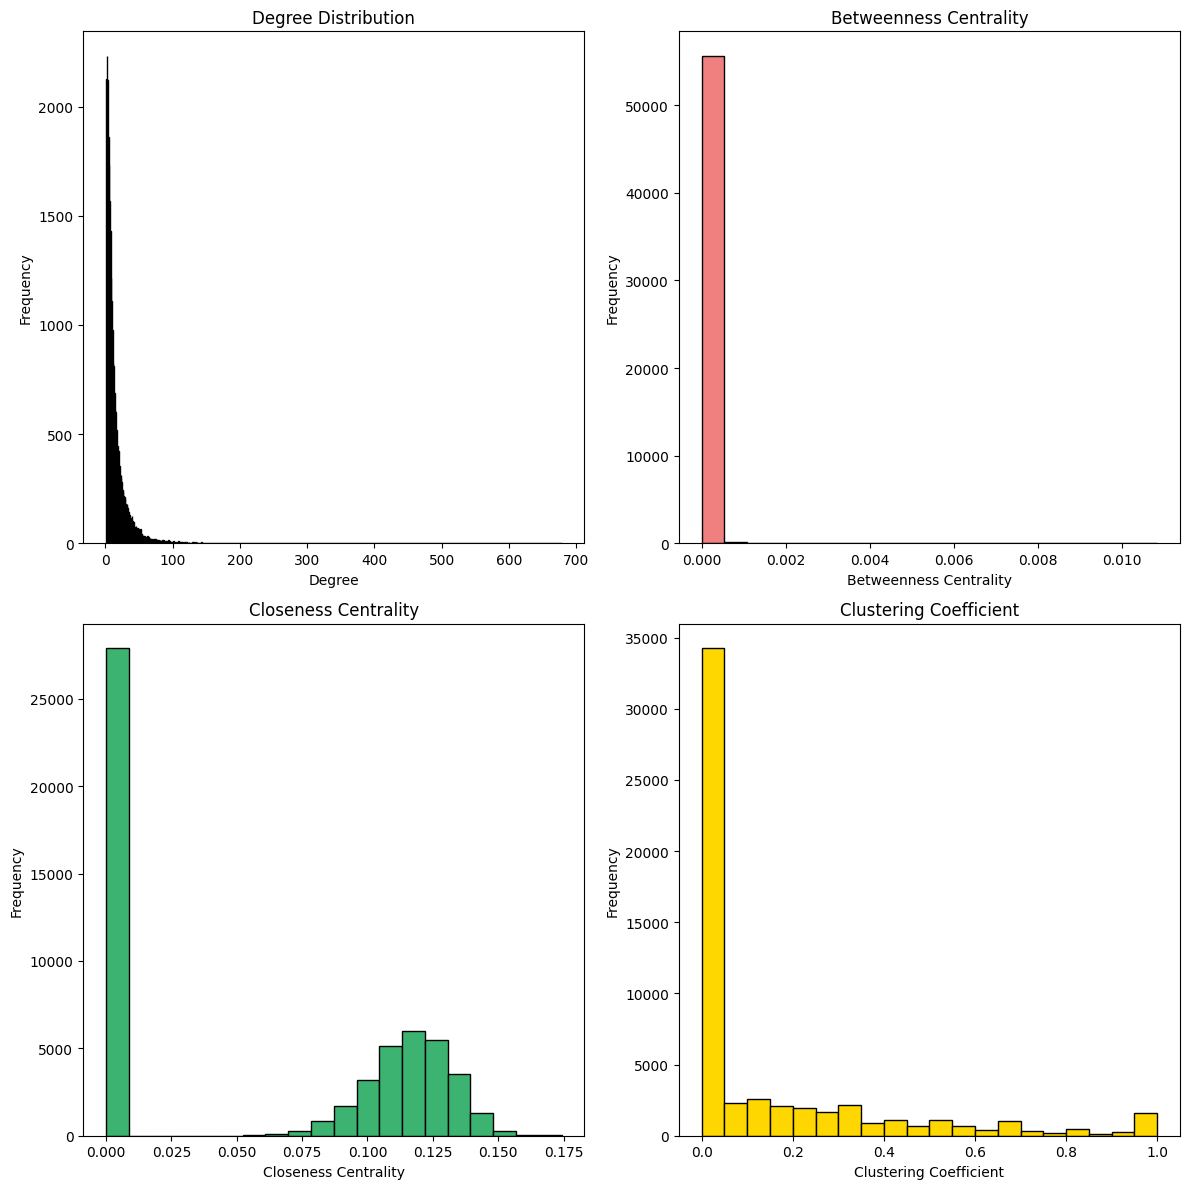

In [12]:
# Create a combined plot showing degree, betweenness, closeness, and clustering
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Degree distribution
axs[0, 0].hist(degrees.values(), bins=range(1, max_degree+1), color='skyblue', edgecolor='black')
axs[0, 0].set_title("Degree Distribution", fontsize=12)
axs[0, 0].set_xlabel("Degree", fontsize=10)
axs[0, 0].set_ylabel("Frequency", fontsize=10)

# Betweenness centrality distribution
axs[0, 1].hist(betweenness.values(), bins=20, color='lightcoral', edgecolor='black')
axs[0, 1].set_title("Betweenness Centrality", fontsize=12)
axs[0, 1].set_xlabel("Betweenness Centrality", fontsize=10)
axs[0, 1].set_ylabel("Frequency", fontsize=10)

# Closeness centrality distribution
axs[1, 0].hist(closeness.values(), bins=20, color='mediumseagreen', edgecolor='black')
axs[1, 0].set_title("Closeness Centrality", fontsize=12)
axs[1, 0].set_xlabel("Closeness Centrality", fontsize=10)
axs[1, 0].set_ylabel("Frequency", fontsize=10)

# Clustering coefficient distribution
axs[1, 1].hist(clustering.values(), bins=20, color='gold', edgecolor='black')
axs[1, 1].set_title("Clustering Coefficient", fontsize=12)
axs[1, 1].set_xlabel("Clustering Coefficient", fontsize=10)
axs[1, 1].set_ylabel("Frequency", fontsize=10)

plt.tight_layout()
plt.show()

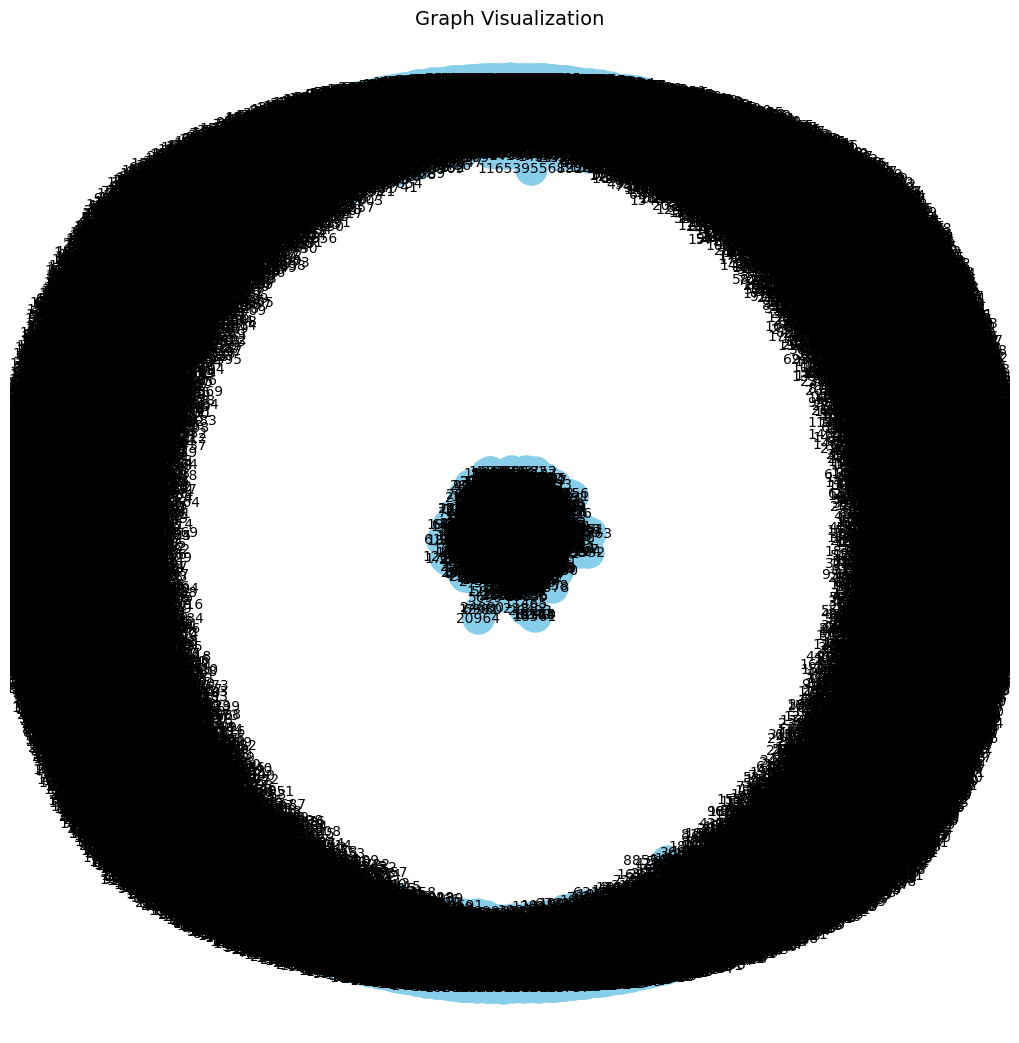

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

# Display the graph
plt.figure(figsize=(10, 10))

# Choose a layout for the graph (spring layout is often a good choice)
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw the graph with node labels and custom styling
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', edge_color='gray')

# Show the plot
plt.title("Graph Visualization", fontsize=14)
plt.show()

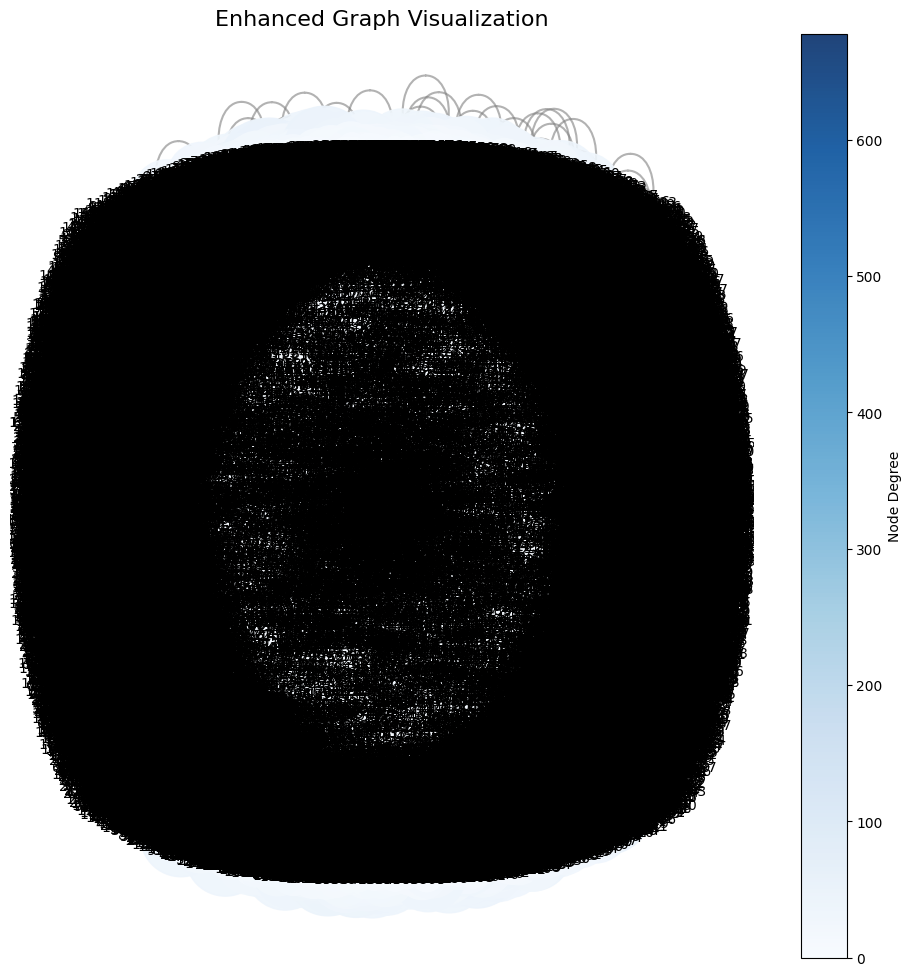

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

# Calculate node degrees for sizing
degrees = dict(G.degree())
node_sizes = [v * 100 for v in degrees.values()]  # Scale node sizes by their degree

# Display the graph
plt.figure(figsize=(12, 12))

# Choose a layout for the graph (spring layout is often a good choice for clear separation)
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Spring layout with more iterations for better spacing

# Draw nodes with a color map based on degree (higher degree = darker color)
nodes = nx.draw_networkx_nodes(
    G, pos, node_size=node_sizes, node_color=list(degrees.values()), cmap=plt.cm.Blues, alpha=0.9
)

# Draw edges with custom settings (thicker, lighter edges)
edges = nx.draw_networkx_edges(
    G, pos, edge_color='gray', width=1.5, alpha=0.6
)

# Draw labels for nodes
labels = nx.draw_networkx_labels(
    G, pos, font_size=10, font_color='black'
)

# Add a color bar based on node degrees
plt.colorbar(nodes, label="Node Degree")  # Use the "nodes" object as the mappable

# Final adjustments and show the plot
plt.title("Enhanced Graph Visualization", fontsize=16)
plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()